In [ ]:
%matplotlib inline
from pylab import *
from sci378 import *
from sci378.stats import *

Version:  0.0.37


[<matplotlib.lines.Line2D>]

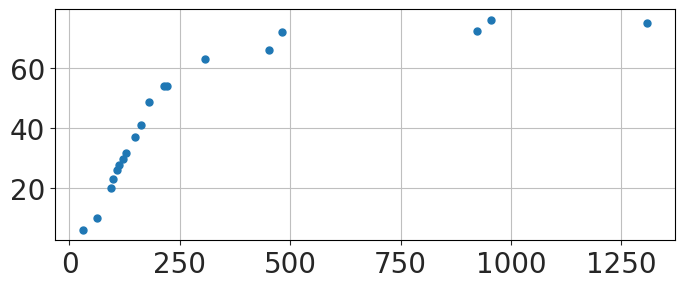

In [ ]:
data=pd.read_csv('data/dog_mass.csv')
t_data=data['days'].values
y_data=data['mass'].values

figure(figsize=(8,3))
plot(t_data, y_data, 'o')

In [ ]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.35


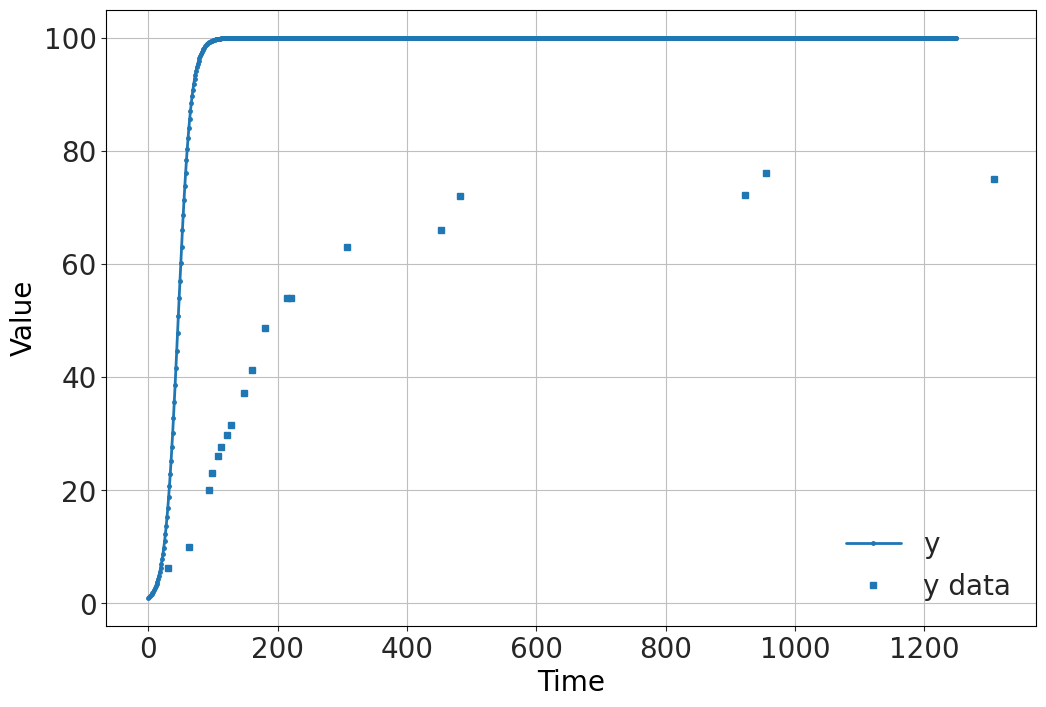

<Figure size 1200x800 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",initial_value=1,plot=True)
sim.params(a=0.1,K=100)
sim.add_data(t=t_data,y=y_data,plot=True)
sim.run(1250)

In [ ]:
def logprior(a,K,initial_y,σ):
    value=0. 
    
    value+=logUniform(a,0,30)
    value+=logUniform(K,0,1000)
    value+=logUniform(initial_y,0,10)
    value+=logJeffreys(σ)
    
    return value

def loglikelihood(sim,a,K,initial_y,σ):
    # pyndamics already has the data in the Simulation object
    err=sim.err(a=a,K=K,initial_y=initial_y)
    return logNormal(err,0,σ)


In [ ]:
model=MCMCModel(sim,loglikelihood,logprior)

In [ ]:
model.run_mcmc(400,repeat=2,verbose=True)
model.plot_chains()

Sampling Prior...
Done.
0.16 s
Running MCMC 1/2...
emcee: Exception while calling your likelihood function:
  params: [8.81570526e+00 2.88531550e+02 1.86301530e-02]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/opt/anaconda3/envs/work/lib/python3.11/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/work/lib/python3.11/site-packages/sci378/stats.py", line 685, in __call__
    return self.lnprob(theta)
           ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/work/lib/python3.11/site-packages/sci378/stats.py", line 682, in lnprob
    return lp + self.lnlike(theta)
        ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/work/lib/python3.11/site-packages/sci378/stats.py", line 1326, in lnlike
    return self.lnlike_function(self.data,**params_dict)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bblais/tmp/ipykernel_70632/3278847305.py", line 13, in loglikelihood
    err=sim.err(a=a,K=K)
        ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/work/lib/python3.11/site-packages/pyndamics3/core.py", line 1189

UnboundLocalError: cannot access local variable '_c' where it is not associated with a value

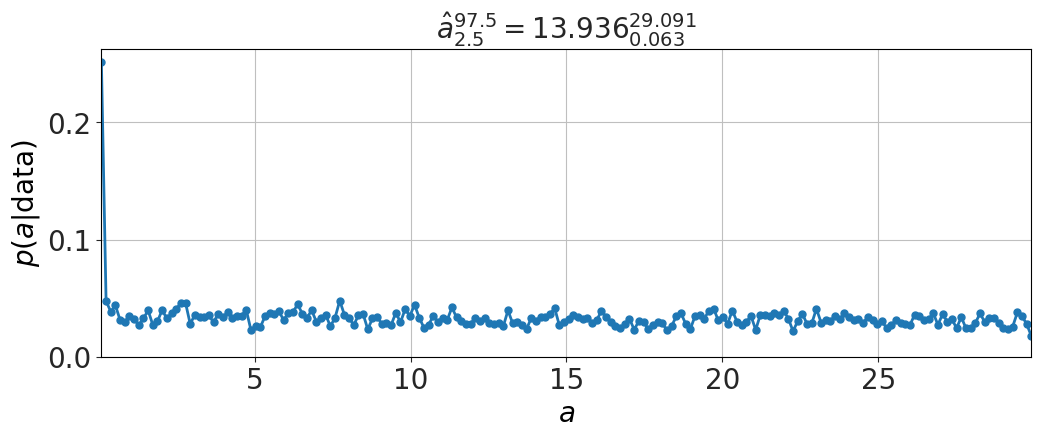

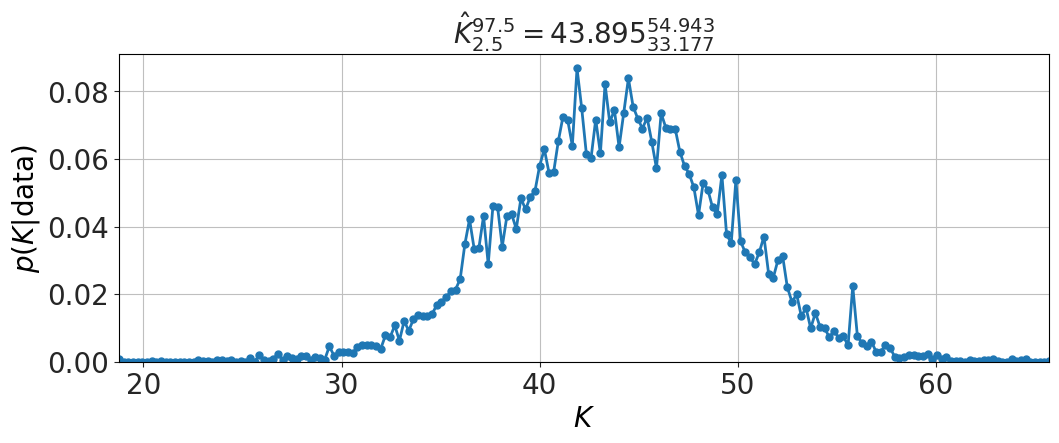

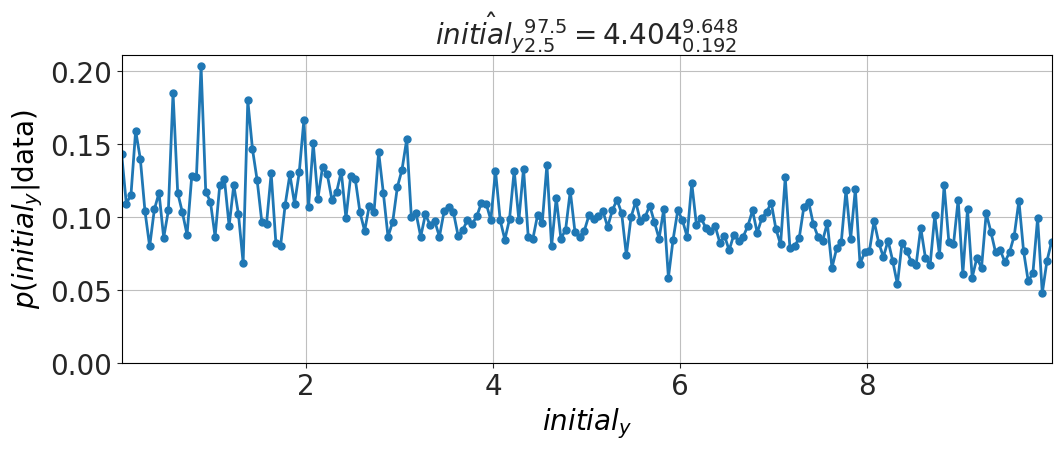

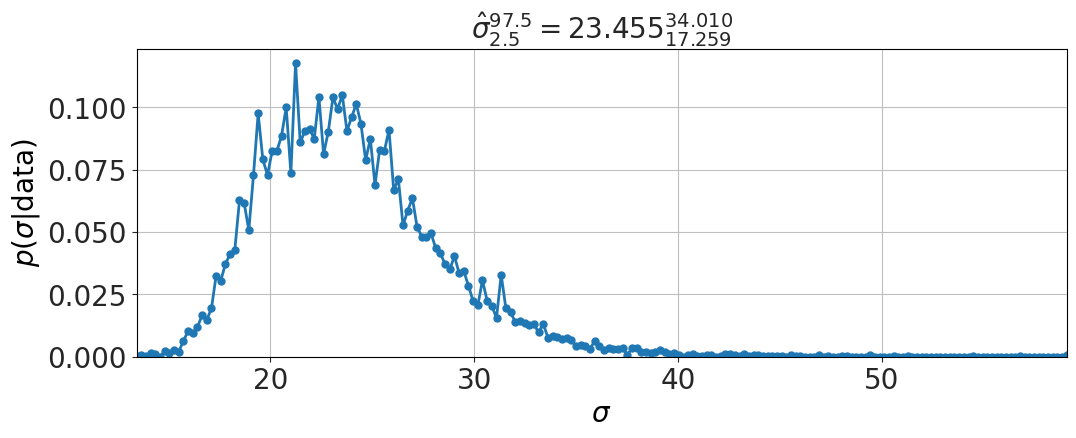

In [ ]:
model.plot_distributions()